<a href="https://colab.research.google.com/github/nitinranjansharma/EIP4-Week1/blob/master/Week3/Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# validation score on original = 83.44

In [1]:
! pip install six numpy scipy Pillow matplotlib scikit-image opencv-python imageio Shapely
! pip install imgaug

In [0]:
import imgaug.augmenters as iaa

In [3]:
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2019) 
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D, SeparableConv2D
from keras.layers import Activation, Flatten, Dense, Dropout,GlobalAveragePooling2D
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils

Using TensorFlow backend.


In [0]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

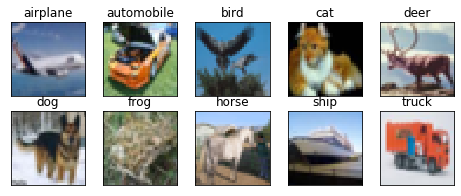

In [5]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [0]:
# Augmentation sequence 
seq = iaa.OneOf([
    iaa.Fliplr(), # horizontal flips
    iaa.Affine(rotate=20)]) # roatation


In [0]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [0]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

In [10]:
train_labels.shape

(50000, 10)

In [11]:
print(train_features.shape)
print(test_features.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [13]:
# first model
'''
model1 = Sequential()
model1.add(SeparableConv2D(filters=48,kernel_size=(3,3),padding='same',use_bias=False,activation='relu', input_shape=(32,32,3))) # 32 * 32 * 16
model1.add(BatchNormalization())
model1.add(Dropout(0.2))

model1.add(Convolution2D(filters=64,kernel_size=(3,3),  use_bias=False, activation='relu')) #30*30*32
model1.add(BatchNormalization())
model1.add(Dropout(0.2))

model1.add(Convolution2D(filters=64,kernel_size=(3,3),  use_bias=False, activation='relu')) #28*28*64
model1.add(BatchNormalization())
model1.add(Dropout(0.2))

model1.add(Convolution2D(filters=128,kernel_size=(3,3), use_bias=False, activation='relu')) #26*26*128
model1.add(BatchNormalization())
model1.add(Dropout(0.2))

model1.add(MaxPooling2D(pool_size=(2,2))) #13*13*128
model1.add(Dropout(0.2))

model1.add(Convolution2D(filters=16,kernel_size=(1,1), use_bias=False, activation='relu')) # 13*13*16
model1.add(BatchNormalization())
model1.add(Dropout(0.2))

model1.add(Convolution2D(filters=48,kernel_size=(3,3), use_bias=False, activation='relu')) # 11*11*32
model1.add(BatchNormalization())
model1.add(Dropout(0.2))

model1.add(Convolution2D(filters=48,kernel_size=(3,3), use_bias=False, activation='relu')) #9*9*64
model1.add(BatchNormalization())
model1.add(Dropout(0.2))

model1.add(Convolution2D(filters=48,kernel_size=(3,3), use_bias=False, activation='relu')) #7*7*128
model1.add(BatchNormalization())
model1.add(Dropout(0.2))

model1.add(Convolution2D(filters=10,kernel_size=(7,7), use_bias=False, activation='relu')) #1*1*10
model1.add(GlobalAveragePooling2D())
model1.add(Activation('softmax'))


model1.summary()

'''

"\nmodel1 = Sequential()\nmodel1.add(SeparableConv2D(filters=48,kernel_size=(3,3),padding='same',use_bias=False,activation='relu', input_shape=(32,32,3))) # 32 * 32 * 16\nmodel1.add(BatchNormalization())\nmodel1.add(Dropout(0.2))\n\nmodel1.add(Convolution2D(filters=64,kernel_size=(3,3),  use_bias=False, activation='relu')) #30*30*32\nmodel1.add(BatchNormalization())\nmodel1.add(Dropout(0.2))\n\nmodel1.add(Convolution2D(filters=64,kernel_size=(3,3),  use_bias=False, activation='relu')) #28*28*64\nmodel1.add(BatchNormalization())\nmodel1.add(Dropout(0.2))\n\nmodel1.add(Convolution2D(filters=128,kernel_size=(3,3), use_bias=False, activation='relu')) #26*26*128\nmodel1.add(BatchNormalization())\nmodel1.add(Dropout(0.2))\n\nmodel1.add(MaxPooling2D(pool_size=(2,2))) #13*13*128\nmodel1.add(Dropout(0.2))\n\nmodel1.add(Convolution2D(filters=16,kernel_size=(1,1), use_bias=False, activation='relu')) # 13*13*16\nmodel1.add(BatchNormalization())\nmodel1.add(Dropout(0.2))\n\nmodel1.add(Convolution2D

In [14]:
'''
#trying with all depth wise conv2d last best
model1 = Sequential()
model1.add(SeparableConv2D(filters=32,kernel_size=(3,3),padding='same',use_bias=False, input_shape=(32,32,3))) # 32 * 32 * 48
model1.add(BatchNormalization())
model1.add(Dropout(0.2))

model1.add(SeparableConv2D(filters=64,kernel_size=(3,3), activation='relu', use_bias=False)) #30*30*32
model1.add(BatchNormalization())
model1.add(Dropout(0.2))

model1.add(SeparableConv2D(filters=128,kernel_size=(3,3),  use_bias=False, activation='relu')) #28*28*64
model1.add(BatchNormalization())
model1.add(Dropout(0.2))

model1.add(SeparableConv2D(filters=128,kernel_size=(3,3), use_bias=False, activation='relu')) #26*26*128
model1.add(BatchNormalization())
model1.add(Dropout(0.2))

model1.add(MaxPooling2D(pool_size=(2,2))) #13*13*128
model1.add(Dropout(0.1))

model1.add(SeparableConv2D(filters=32,kernel_size=(1,1), use_bias=False, activation='relu')) # 13*13*16
model1.add(BatchNormalization())
model1.add(Dropout(0.1))

model1.add(SeparableConv2D(filters=64,kernel_size=(3,3), use_bias=False, activation='relu')) # 11*11*32
model1.add(BatchNormalization())
model1.add(Dropout(0.1))


model1.add(SeparableConv2D(filters=64,kernel_size=(3,3), use_bias=False, activation='relu')) #9*9*64
model1.add(BatchNormalization())
model1.add(Dropout(0.1))

model1.add(SeparableConv2D(filters=128,kernel_size=(3,3), use_bias=False, activation='relu')) #9*9*64
model1.add(BatchNormalization())
model1.add(Dropout(0.1))

model1.add(SeparableConv2D(filters=128,kernel_size=(3,3), use_bias=False, activation='relu')) #7*7*128
model1.add(BatchNormalization())
model1.add(Dropout(0.1))

model1.add(SeparableConv2D(filters=128,kernel_size=(3,3), use_bias=False, activation='relu')) #7*7*128
model1.add(BatchNormalization())
model1.add(Dropout(0.1))

model1.add(SeparableConv2D(filters=10,kernel_size=(1,1), use_bias=False, activation='relu')) #7*7*128
model1.add(BatchNormalization())
model1.add(Dropout(0.1))

#model1.add(SeparableConv2D(filters=10,kernel_size=(3,3), use_bias=False, activation='relu')) #1*1*10
model1.add(GlobalAveragePooling2D())
model1.add(Activation('softmax'))


model1.summary()



'''

"\nmodel1 = Sequential()\nmodel1.add(SeparableConv2D(filters=48,kernel_size=(3,3),padding='same',use_bias=False,activation='relu', input_shape=(32,32,3))) # 32 * 32 * 16\nmodel1.add(BatchNormalization())\nmodel1.add(Dropout(0.2))\n\nmodel1.add(Convolution2D(filters=64,kernel_size=(3,3),  use_bias=False, activation='relu')) #30*30*32\nmodel1.add(BatchNormalization())\nmodel1.add(Dropout(0.2))\n\nmodel1.add(Convolution2D(filters=64,kernel_size=(3,3),  use_bias=False, activation='relu')) #28*28*64\nmodel1.add(BatchNormalization())\nmodel1.add(Dropout(0.2))\n\nmodel1.add(Convolution2D(filters=128,kernel_size=(3,3), use_bias=False, activation='relu')) #26*26*128\nmodel1.add(BatchNormalization())\nmodel1.add(Dropout(0.2))\n\nmodel1.add(MaxPooling2D(pool_size=(2,2))) #13*13*128\nmodel1.add(Dropout(0.2))\n\nmodel1.add(Convolution2D(filters=16,kernel_size=(1,1), use_bias=False, activation='relu')) # 13*13*16\nmodel1.add(BatchNormalization())\nmodel1.add(Dropout(0.2))\n\nmodel1.add(Convolution2D

In [30]:
#trying with all depth wise conv2d
model1 = Sequential()
model1.add(SeparableConv2D(filters=32,kernel_size=(3,3),padding='same',use_bias=False, input_shape=(32,32,3))) # 32 * 32 * 48
model1.add(BatchNormalization())
model1.add(Dropout(0.2))

model1.add(SeparableConv2D(filters=64,kernel_size=(3,3), activation='relu', use_bias=False)) #30*30*32
model1.add(BatchNormalization())
model1.add(Dropout(0.2))

model1.add(SeparableConv2D(filters=128,kernel_size=(3,3),  use_bias=False, activation='relu')) #28*28*64
model1.add(BatchNormalization())
model1.add(Dropout(0.2))

model1.add(SeparableConv2D(filters=128,kernel_size=(3,3), use_bias=False, activation='relu')) #26*26*128
model1.add(BatchNormalization())
model1.add(Dropout(0.2))

model1.add(SeparableConv2D(filters=128,kernel_size=(3,3), use_bias=False, activation='relu')) #26*26*128
model1.add(BatchNormalization())
model1.add(Dropout(0.2))

model1.add(MaxPooling2D(pool_size=(2,2))) #13*13*128
model1.add(Dropout(0.1))

model1.add(SeparableConv2D(filters=32,kernel_size=(1,1), use_bias=False, activation='relu')) # 13*13*16
model1.add(BatchNormalization())
model1.add(Dropout(0.1))

model1.add(SeparableConv2D(filters=64,kernel_size=(3,3), use_bias=False, activation='relu')) # 11*11*32
model1.add(BatchNormalization())
model1.add(Dropout(0.1))


model1.add(SeparableConv2D(filters=64,kernel_size=(3,3), use_bias=False, activation='relu')) #9*9*64
model1.add(BatchNormalization())
model1.add(Dropout(0.1))

model1.add(SeparableConv2D(filters=128,kernel_size=(3,3), use_bias=False, activation='relu')) #9*9*64
model1.add(BatchNormalization())
model1.add(Dropout(0.1))

model1.add(SeparableConv2D(filters=128,kernel_size=(3,3), use_bias=False, activation='relu')) #7*7*128
model1.add(BatchNormalization())
model1.add(Dropout(0.1))



model1.add(SeparableConv2D(filters=10,kernel_size=(1,1), use_bias=False, activation='relu')) #7*7*128
model1.add(BatchNormalization())
model1.add(Dropout(0.1))

#model1.add(SeparableConv2D(filters=10,kernel_size=(3,3), use_bias=False, activation='relu')) #1*1*10
model1.add(GlobalAveragePooling2D())
model1.add(Dense(units=10))
model1.add(Dense(units=100))
model1.add(Dense(units=10))
model1.add(Activation('softmax'))


model1.summary()



Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
separable_conv2d_102 (Separa (None, 32, 32, 32)        123       
_________________________________________________________________
batch_normalization_103 (Bat (None, 32, 32, 32)        128       
_________________________________________________________________
dropout_113 (Dropout)        (None, 32, 32, 32)        0         
_________________________________________________________________
separable_conv2d_103 (Separa (None, 30, 30, 64)        2336      
_________________________________________________________________
batch_normalization_104 (Bat (None, 30, 30, 64)        256       
_________________________________________________________________
dropout_114 (Dropout)        (None, 30, 30, 64)        0         
_________________________________________________________________
separable_conv2d_104 (Separa (None, 28, 28, 128)     

In [0]:
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., use_multiprocessing=True, validation_data=(array([[[..., verbose=1, steps_per_epoch=200, epochs=50)`
  if sys.path[0] == '':


Epoch 1/50
200/200 [==============================] - 84s 419ms/step - loss: 1.7394 - acc: 0.3499 - val_loss: 1.7267 - val_acc: 0.4128
Epoch 2/50
200/200 [==============================] - 75s 373ms/step - loss: 1.2999 - acc: 0.5297 - val_loss: 1.3655 - val_acc: 0.5274
Epoch 3/50
200/200 [==============================] - 75s 375ms/step - loss: 1.1274 - acc: 0.5957 - val_loss: 1.1318 - val_acc: 0.5997
Epoch 4/50
200/200 [==============================] - 75s 375ms/step - loss: 1.0327 - acc: 0.6321 - val_loss: 1.0653 - val_acc: 0.6368
Epoch 5/50
200/200 [==============================] - 75s 375ms/step - loss: 0.9659 - acc: 0.6574 - val_loss: 1.0080 - val_acc: 0.6538
Epoch 6/50
200/200 [==============================] - 74s 372ms/step - loss: 0.9092 - acc: 0.6786 - val_loss: 0.9245 - val_acc: 0.6838
Epoch 7/50
200/200 [==============================] - 74s 372ms/step - loss: 0.8664 - acc: 0.6944 - val_loss: 0.9121 - val_acc: 0.6926
Epoch 8/50
200/200 [==============================] - 7

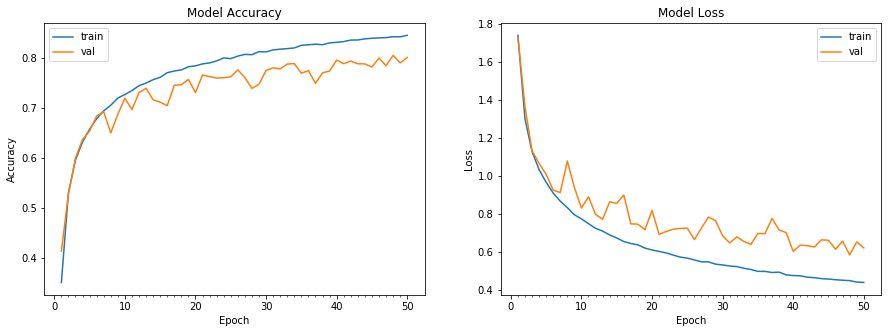

Accuracy on test data is: 80.14


In [32]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=True)


# train the model
start = time.time()
# Train the model
model_info = model1.fit_generator(datagen.flow(train_features, train_labels, batch_size = 250),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50,use_multiprocessing=True, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model1))

In [55]:
train_labels.shape

(50000, 10, 10)